In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm
import numpy as np

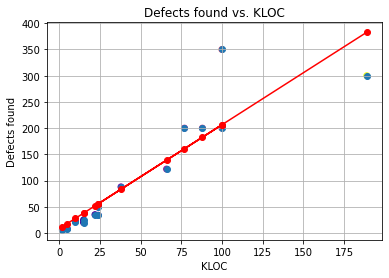

In [2]:
df = pd.read_csv('defects.csv')

x = df['Lines of Code (KLOC)']
y = df['Defects found ']
fig, ax = plt.subplots()

_ = ax.scatter(x, y, c=x, cmap='plasma')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r-o")
ax.set_xlabel('KLOC')
ax.set_ylabel('Defects found')
ax.set_title('Defects found vs. KLOC')
ax.grid()

ax.scatter(df['Lines of Code (KLOC)'], df['Defects found '])
ax.figure.savefig('defects_vs_KLOC.png')

In [3]:
avg = df['Defects found '] /df['Lines of Code (KLOC)']

mu = sum(avg)/len(avg)
sigma = statistics.stdev(avg)
#x = mu + sigma * 
x = avg #np.random.randn(150)
num_bins = 15

In [4]:
avg

0     3.000000
1     1.600000
2     2.200000
3     1.666667
4     1.333333
5     1.590909
6     1.416667
7     2.315789
8     1.848485
9     2.597403
10    3.500000
11    2.272727
12    2.083333
13    2.000000
14    1.587302
dtype: float64

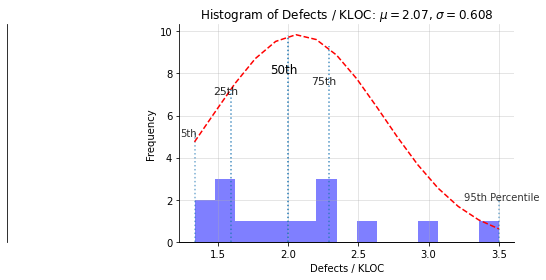

In [34]:
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
y = norm.pdf(bins, mu, sigma)

quant_5, quant_25, quant_50, quant_75, quant_95 = np.percentile(avg, 0), np.percentile(avg, 25), np.percentile(avg, 50), np.percentile(avg, 75), np.percentile(avg, 100)
quants = [[quant_5, 0.6, 0.5], [quant_25, 0.8, 0.7], [quant_50, 1, .95],  [quant_75, 0.8, 0.9], [quant_95, 0.6, 0.2]]
for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
    
plt.text(quant_5-.1, 5, "5th", size = 10, alpha = 0.8)
plt.text(quant_25-.13, 7, "25th", size = 11, alpha = 0.85)
plt.text(quant_50-.13, 8, "50th", size = 12, alpha = 1)
plt.text(quant_75-.13, 7.5, "75th", size = 11, alpha = 0.85)
plt.text(quant_95-.25, 2, "95th Percentile", size = 10, alpha =.8)
    
plt.plot(bins, y*num_bins, 'r--')
plt.xlabel('Defects / KLOC')
plt.ylabel('Frequency')
plt.title(r'Histogram of Defects / KLOC: $\mu=' + str(round(sum(avg)/len(avg), 2)) + '$, $\sigma=' + str(round(statistics.stdev(avg), 4)) + '$')
plt.grid(alpha = 0.4)

plt.gca().spines['top'].set_position(('data',0))
plt.gca().spines['right'].set_position(('data',0))
plt.savefig('histogram.png')
plt.show()

In [6]:

'''
x = ['Mean', 'Std Dev', '0% Per.', '25% Per.', '50% Per.', '75% Per.', '100% Per.']
y = [mu, sigma, np.percentile(avg, 0), np.percentile(avg, 25), np.percentile(avg, 50), np.percentile(avg, 75), np.percentile(avg, 100)]

plt.bar(x, y)
plt.xticks(rotation = 45)
plt.grid(alpha = 0.25)
for i, v in enumerate(y):
    plt.text(range(1,15)[i]-1.25, v + .1, str(round(v, 2)))


plt.show()
'''

"\nx = ['Mean', 'Std Dev', '0% Per.', '25% Per.', '50% Per.', '75% Per.', '100% Per.']\ny = [mu, sigma, np.percentile(avg, 0), np.percentile(avg, 25), np.percentile(avg, 50), np.percentile(avg, 75), np.percentile(avg, 100)]\n\nplt.bar(x, y)\nplt.xticks(rotation = 45)\nplt.grid(alpha = 0.25)\nfor i, v in enumerate(y):\n    plt.text(range(1,15)[i]-1.25, v + .1, str(round(v, 2)))\n\n\nplt.show()\n"